# COMP20008 2021S2 workshop week 11

## Chi Squared Feature Selection
The following code implements the example in Slide 19 of the Experimental design lecture

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

data = pd.DataFrame(np.array([[1,1,1],[1,0,1],[0,1,0],[0,0,0]]), columns=['a1','a2','c'])
features=data[['a1','a2']]
class_label = data['c']
cont_table = pd.crosstab(class_label,features['a1'])
chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
print('Chi2 value: ',chi2_val)
if(p<0.05) : 
    print('Null hypothesis rejected, p value: ', p)
else :
    print('Null hypothesis accepted, p value: ', p)



Chi2 value:  4.0
Null hypothesis rejected, p value:  0.04550026389635857


### Question 2

Adapt the example above to calculate the Chi2 values for each feature in Question 1.  Ensure that the results agree with your answer to Question 1.


In [17]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

data = pd.DataFrame(np.array([[1,0,1],[1,1,1],[1,1,1],[1,0,0],[1,1,1],[0,0,0],[0,0,0],[0,0,0],[1,1,0],[0,0,0]]), columns=['A','B','Class'])
features=data[['A','B']]
class_label = data['Class']

for feature in ['A','B'] :
    cont_table = pd.crosstab(class_label,features[feature])
    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    print('Chi2 value for feature', feature,': ',chi2_val)
    if(p<0.05) : 
        print('Null hypothesis rejected for feature', feature, 'p value:', p)
    else :
        print('Null hypothesis accepted for feature', feature, 'p value:', p)



Chi2 value for feature A :  4.444444444444445
Null hypothesis rejected for feature A p value: 0.03501498101966245
Chi2 value for feature B :  3.4027777777777777
Null hypothesis accepted for feature B p value: 0.0650867264927665


# Experimental Evaluation

K-fold cross validation is important to ensure that the results we report are reliable, and not merely the result of a 'lucky' test_train split.  Below is an example of K-fold cross validation applied to the World Development Index dataset.

Note also the process in the loop below - we've started by doing the test_train split then performed other functions like scaling and imputation on the training set and applied the results to the testing set.  This is important to ensure that we don't violate the test_train split and apply our understanding of the testing set when building our model.

In [18]:
world= pd.read_csv('world_org.csv')
life = pd.read_csv('life.csv')
world.set_index('Country Code')
life.set_index('Country Code')
all_data = world.merge(life)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

##get just the features
data=all_data.iloc[:, 5:-1]


##get just the class labels
classlabel=all_data['Life expectancy at birth (years)']

k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
acc_score = []
for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]

    #Scale the data
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #Impute missing values via mean imputation
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train = imp.fit_transform(X_train)
    X_test = imp.transform(X_test)
    
    #Train k-nn classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    #Predict result
    y_pred=knn.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))

print(acc_score)
#Display average of accuracy scores
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

[0.7368421052631579, 0.8421052631578947, 0.8421052631578947, 0.7222222222222222, 0.8333333333333334, 0.6666666666666666, 0.8333333333333334, 0.6111111111111112, 0.7222222222222222, 0.4444444444444444]
0.7254385964912282


### Question 3
Experiment with different values of k and the random_state parameter.  What might be an optimal k value in this case?  How could we further improve the reliability of our results?

In [20]:
# Answer

# Principal components analysis

Principal components analysis can be used for transforming data into a different (lower dimensional) representation.  This is particularly useful for visualisation, computational efficiency and removing noisy data.

The python sci-kit learn package (sklearn) contains functions which can be used for PCA.  Consider the example below of introducing PCA to the previous task


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

##get just the features
data=all_data.iloc[:, 5:-1]


##get just the class labels
classlabel=all_data['Life expectancy at birth (years)']

k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
acc_score = []
for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]

    #Scale the data
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #Impute missing values via mean imputation
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train = imp.fit_transform(X_train)
    X_test = imp.transform(X_test)
    
    #Perform PCA
    pca = PCA(n_components=5)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    #Train k-nn classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    #Predict result
    y_pred=knn.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))

print(acc_score)
#Display average of accuracy scores
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

[0.631578947368421, 0.7894736842105263, 0.6842105263157895, 0.8333333333333334, 0.7777777777777778, 0.6666666666666666, 0.8333333333333334, 0.7777777777777778, 0.7777777777777778, 0.5]
0.7271929824561403


### Question 4
Experiment with different numbers of components.  What gives the best result?  How could you decide on the appropriate number of principal components to use?

In [22]:
# Answer

# Visualisation using PCA

Consider the example below of applying PCA on the iris dataset.


In [23]:
iris= pd.read_csv('iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns
iris2

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Variance explained by each PC [0.92461621 0.05301557]


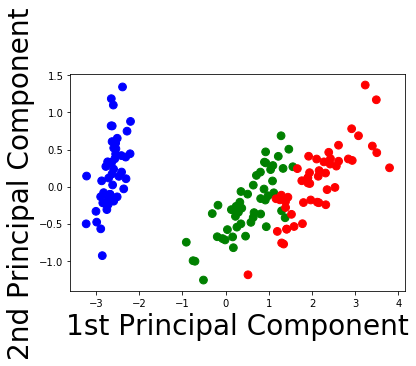

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
##########################################################
#######Example of performing PCA on Iris dataset and visualising####################
##########################################################


sklearn_pca = PCA(n_components=2)   #we want just the first two PCs
iris_sklearn = sklearn_pca.fit_transform(iris2)
print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_)   #print out the amount of variance explained by each PC

#set up the colour scheme
palette=palette = ['blue','green','red']
colors=iris.Name.replace(to_replace=iris.Name.unique(),value=palette).tolist()

#plot the objects along the first two principal components, using the colour scheme
plt.scatter(iris_sklearn[:,0],iris_sklearn[:,1],s=60,c=colors)   #plot the PC's in 2D - s marker size
plt.xlabel('1st Principal Component', fontsize=28)
plt.ylabel('2nd Principal Component', fontsize=28)
plt.show()

### Question 5)

What can you observe about the clustering behavior of the iris dataset from the plot above?  What other techniques could you use to help visualise the clustering behavior?

In [25]:
# Answer

## VAT - Visual Assessment for Clustering Tendency

We've already seen the VAT algorithm for visualising the clustering tendency of a dataset.   Below is python code for VAT.  You can treat it as a black box (not worrying about the internal coding details) - a function which can be used to execute VAT on an input dataset.


In [26]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I




### Visualising iris datset using VAT

We will first recreate the visualisations of the iris dataset used in lectures (lecture 7).   Info about the iris dataset is [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).  First a heatmap of the raw iris dataset is displayed.  Secondly a randomly ordered dissimilarity matrix for the objects in iris is shown - notice the lack of structure.   Thirdly the VAT visualisation is produced.  The heatmap function from the seaborn package is employed as a convenient tool for plotting heatmaps.

Below is an example of the VAT algorithm applied to the same iris dataset

In [27]:
iris= pd.read_csv('iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns
iris2

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


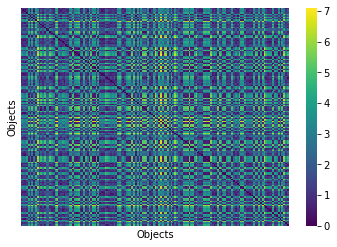

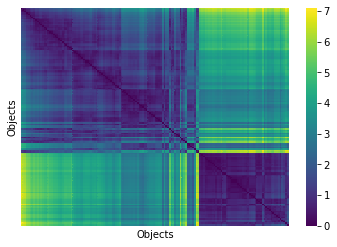

In [28]:
import seaborn as sns

##########################################################
#######Read in the datset###############
##########################################################
iris= pd.read_csv('iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns

####Draw heatmap of raw Iris matrix#######j
#sns.heatmap(iris2,cmap='viridis',xticklabels=True,yticklabels=False)
#plt.show()

####Visualise the dissimilarity matrix for Iris using a heatmap (without applying VAT)####
iris3=iris2.copy().values
np.random.shuffle(iris3)   ####randomise the order of rows (objects)

sq = squareform(pdist(iris3))   ###compute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()



#####Apply VAT Algorithm to Iris dataset and visualise using heatmap########
RV, C, I = VAT(iris2)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

### Question 6)
Plot VAT heatmap for iris data and tell how many clusters does the VAT visualisation reveal?   How does this compare to the PCA scatterplot?


In [29]:
# Answer


## If you get time: Practicing VAT and PCA

You will now practice using the australian crabs dataset from [this file](australian-crabs.csv).   This data describes 200 crabs collected from Fremantle Western Australia.   There are two species of crabs - blue and orange.   Within each species there are male and female.   There are 5 features:

+ FL - frontal lip
+ RW - rear width
+ CL - carapace length
+ CW - carapace width
+ BD - body depth

The first four of these are visualised as follows:

![crabs](crabsimage.png)

### Question 7) 

Adapt the iris example to produce a VAT heatmap of the australian crabs dataset.   How many clusters are there?
